<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 8: Data Processing & Cleaning for Data Science: Statistics For Data Science

The purpose of this [Jupyter Notebook] is to getting you familairized with Statistics For Data Science

#  Bayes' law
Use Bayes’ law to calculate the probability of getting a data science job if you’ve gotten an interview for the job. This could be written P(get the DS job | interview). You’ll have to use Bayesian probability methods (your intuition or beliefs) to assign values to the different components of Bayes’ law.

`Hint:`
* Usually the probability of getting a job from applying is very low, around 1%. This is based on experience and reading about how most people apply to 100 jobs in order to get 1 job. 
* P(interview | get job) is 99%. Almost no one will hire someone they didn't interview. 
* P(interview | !get job) will be set to 10%. We might interview 10% of candidates, and only one gets the job.

![Alt text](Bayeslaw.png)


In [53]:
#Your Solution
p_getDsJob = 0.01
p_inter_kn_getDsJob = 0.99
p_inter = 0.1*0.99 + 0.1*0.1

p_getDsJob_Kn_inter = (p_inter_kn_getDsJob*p_getDsJob)/(p_inter)
p_getDsJob_Kn_inter

0.09082568807339449

#  Probabilities Distributions

Re-test the codes seen in lecture 8 from slide 6 to 18.


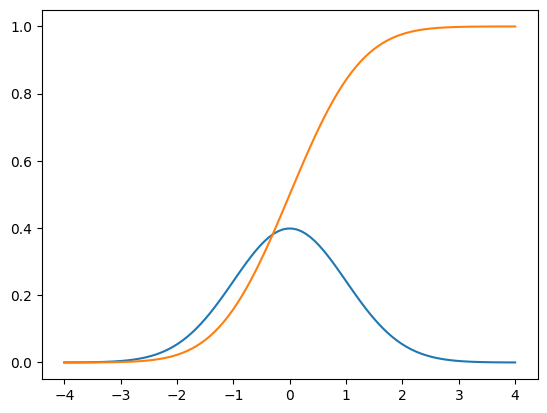

In [54]:
#Your Solution
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.cdf(x))

(array([3.000e+00, 1.000e+00, 6.000e+00, 1.300e+01, 2.800e+01, 4.700e+01,
        8.100e+01, 1.710e+02, 2.330e+02, 3.970e+02, 5.040e+02, 7.040e+02,
        8.330e+02, 9.540e+02, 1.044e+03, 1.027e+03, 9.880e+02, 8.290e+02,
        6.500e+02, 5.260e+02, 3.670e+02, 2.590e+02, 1.580e+02, 8.100e+01,
        4.900e+01, 2.400e+01, 1.500e+01, 5.000e+00, 1.000e+00, 2.000e+00]),
 array([-3.92240025e+00, -3.66077899e+00, -3.39915772e+00, -3.13753646e+00,
        -2.87591519e+00, -2.61429393e+00, -2.35267266e+00, -2.09105139e+00,
        -1.82943013e+00, -1.56780886e+00, -1.30618760e+00, -1.04456633e+00,
        -7.82945068e-01, -5.21323803e-01, -2.59702538e-01,  1.91872741e-03,
         2.63539993e-01,  5.25161258e-01,  7.86782523e-01,  1.04840379e+00,
         1.31002505e+00,  1.57164632e+00,  1.83326758e+00,  2.09488885e+00,
         2.35651011e+00,  2.61813138e+00,  2.87975265e+00,  3.14137391e+00,
         3.40299518e+00,  3.66461644e+00,  3.92623771e+00]),
 <BarContainer object of 30 artists

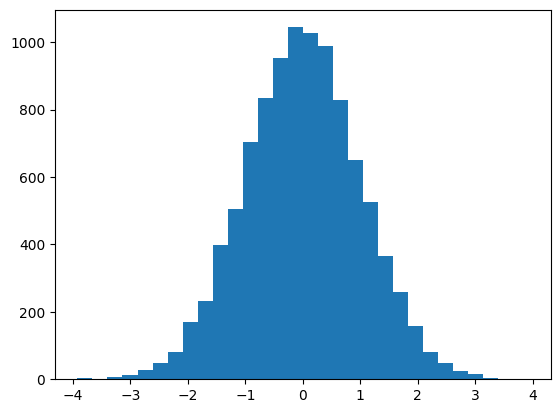

In [55]:
data = norm.rvs(size=10000, random_state=42)
plt.hist(data, bins=30)

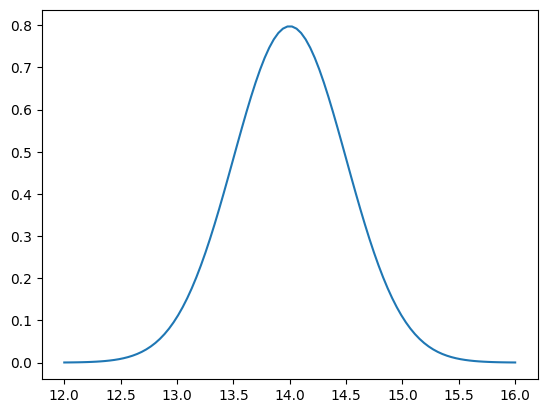

In [56]:
x = np.linspace(12, 16, 100)
plt.plot(x, norm.pdf(x, loc=14, scale=0.5))

In [57]:
data = norm.rvs(size=10000, loc=14, scale=0.5,random_state=42)
data.mean(), data.std()

(13.998932008315789, 0.5017061030649937)

In [58]:
import pandas as pd
df = pd.read_csv('data/solar_cell_efficiencies.csv')
df.describe()

,efficiency
count,187196.000000
mean,14.181805
std,0.488751
min,9.691218
25%,13.932445
50%,14.205567
75%,14.482341
max,17.578530


In [59]:
df

,efficiency
0,14.260772
1,13.463545
2,14.704418
3,13.671162
4,14.186147
...,...
187191,14.602182
187192,14.158041
187193,14.093038
187194,14.478059


In [60]:
import scipy
scipy.stats.norm.fit(df['efficiency'])

(14.181805365742568, 0.4887500401256815)

In [61]:
scipy.stats.bernoulli(p=0.7).rvs()

0

<BarContainer object of 11 artists>

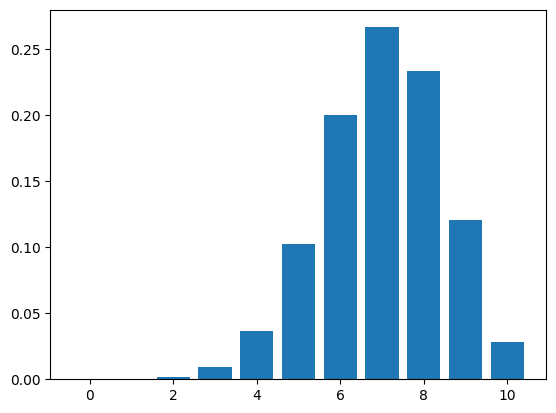

In [62]:
binom_dist = scipy.stats.binom(p=0.7, n=10)
plt.bar(range(11), binom_dist.pmf(k=range(11)))

(array([66438., 66047., 66970., 67099., 66629., 66900., 66899., 67037.,
        66423., 66857., 66743., 66217., 66213., 66852., 66676.]),
 array([3.19637448e-07, 6.66669551e-02, 1.33333591e-01, 2.00000226e-01,
        2.66666861e-01, 3.33333497e-01, 4.00000132e-01, 4.66666768e-01,
        5.33333403e-01, 6.00000039e-01, 6.66666674e-01, 7.33333310e-01,
        7.99999945e-01, 8.66666580e-01, 9.33333216e-01, 9.99999851e-01]),
 <BarContainer object of 15 artists>)

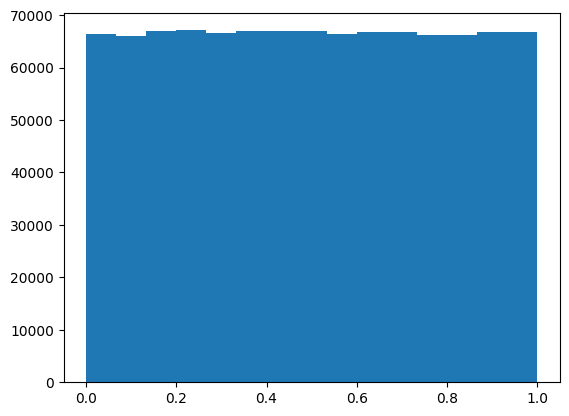

In [63]:
r = scipy.stats.uniform.rvs(size=1000000)
plt.hist(r,bins=15)

[Text(1.6749999999999998, 0.18734072526020495, 'λ=1'),
 Text(3.3249999999999993, 6.717692318475326e-06, 'λ=4')]

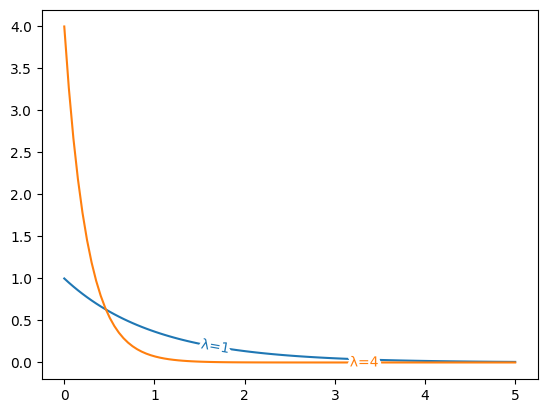

In [64]:
from labellines import labelLines
x = np.linspace(0, 5, 100)
plt.plot(x, scipy.stats.expon.pdf(x, scale=1), label='λ=1')
plt.plot(x, scipy.stats.expon.pdf(x, scale=0.25), label='λ=4')
labelLines(plt.gca().get_lines())

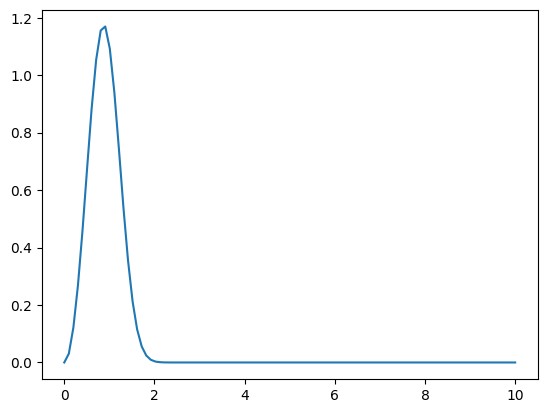

In [65]:
x = np.linspace(0, 10, 100)
plt.plot(x, scipy.stats.weibull_min(c=3).pdf(x))

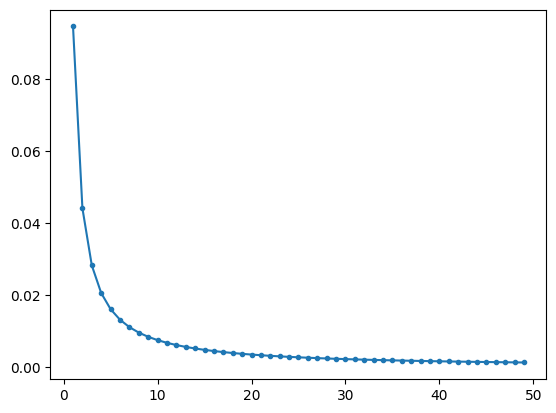

In [66]:
x = range(1, 50)
plt.plot(x, scipy.stats.zipf(a=1.1).pmf(x), marker='.')

In [67]:
df = pd.read_csv('data/solar_cell_efficiencies.csv')
df.sample(100, random_state=42)

,efficiency
87591,13.405397
158602,14.404034
107515,14.458128
116535,14.260624
184959,14.336878
...,...
158398,14.292562
32960,14.725099
29208,14.186570
175322,14.054062


In [68]:
df = pd.read_csv('data/solar_cell_efficiencies.csv')
df.sample(100, random_state=42,replace=True)

,efficiency
121958,14.456823
146867,14.278598
131932,14.388718
103694,14.495444
119879,14.380237
...,...
136330,14.733026
39504,14.250004
164231,14.513828
13986,13.465739


<Axes: ylabel='Count'>

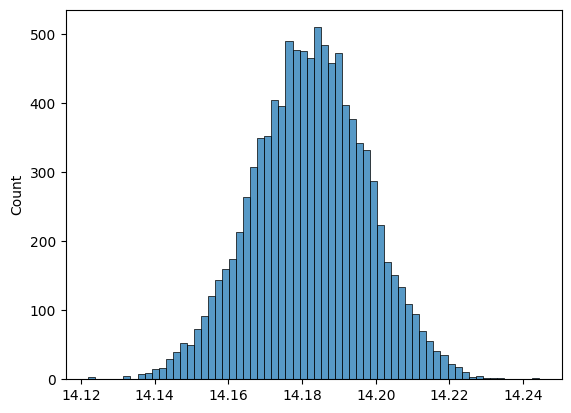

In [69]:
import seaborn as sns
means = []
for i in range(10000):
    sample = np.random.choice(df['efficiency'], 1000,
    replace=True)
    means.append(sample.mean())
sns.histplot(means)

# MISO distributions
Determine the type of distribution and extract the distribution's PDF parameters from the MISO wind power generation data (the MWh column), stored under  data/miso_wind_data.csv. Write a short analysis explaining why you chose that distribution and what the parameters mean.

`Hint:`
Try to fit your data with different probabilities distributions and see what one works better.



In [70]:
#Your Solutions here
df = pd.read_csv('data/miso_wind_data.csv')
df.sample(100, random_state=42)

,Market Day,Hour Ending,MWh
6385,9/23/2020,2,10143.37
1488,3/3/2020,1,12217.14
6539,9/29/2020,12,7995.56
3153,5/11/2020,10,7139.68
496,1/21/2020,17,13028.53
...,...,...,...
5976,9/6/2020,1,12983.7
2208,4/2/2020,1,11585.62
5130,8/1/2020,19,4703.28
8514,12/20/2020,19,13704.78


In [71]:
df.columns

Index(['Market Day', 'Hour Ending', 'MWh'], dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Market Day   8784 non-null   object
 1   Hour Ending  8784 non-null   int64 
 2   MWh          8784 non-null   object
dtypes: int64(1), object(2)
memory usage: 206.0+ KB



# Bootstrap Sampling
Apply bootstrap sampling to the MISO wind power generation data and plot the distribution of the mean wind power generation values.

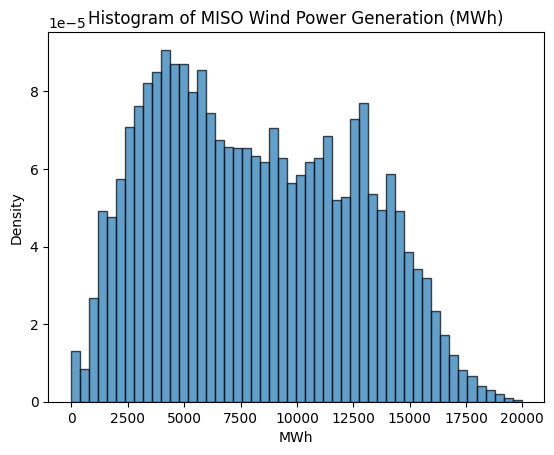

c:\Users\Lenovo\Anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6545: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


('weibull_min', (2.0768052908037644, -445.1744294553837, 9701.000246379008))

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Convert the MWh column to numeric
df['MWh'] = pd.to_numeric(df['MWh'])

# Check for any NaN values after conversion and remove them if necessary
df = df.dropna(subset=['MWh'])

# Extract the MWh column
mwh_data = df['MWh'].values

# Plot the histogram of the data to visualize the distribution
plt.hist(mwh_data, bins=50, density=True, alpha=0.7, edgecolor='black')
plt.title("Histogram of MISO Wind Power Generation (MWh)")
plt.xlabel("MWh")
plt.ylabel("Density")
plt.show()

# Fit the data to different probability distributions and find the best fit
distributions = [stats.norm, stats.expon, stats.lognorm, stats.gamma, stats.weibull_min]
fit_results = {}

for dist in distributions:
    params = dist.fit(mwh_data)
    # Calculate the Kolmogorov-Smirnov statistic as a goodness-of-fit measure
    ks_stat, p_value = stats.kstest(mwh_data, lambda x: dist.cdf(x, *params))
    fit_results[dist.name] = {'params': params, 'ks_stat': ks_stat, 'p_value': p_value}

# Sort distributions by the KS statistic
best_fit = sorted(fit_results.items(), key=lambda x: x[1]['ks_stat'])[0]
best_distribution, best_fit_params = best_fit[0], best_fit[1]['params']

best_distribution, best_fit_params


Weibull Minimum Distribution
The Weibull minimum distribution is another type of continuous probability distribution, often used to model life data, failure times, or similar positively skewed datasets. It’s especially useful for wind speed and power generation modeling in energy applications.

Parameters
The Weibull distribution has three key parameters in your result:

Shape (
𝑘
k) = 2.08:
Determines the shape of the distribution. If 
𝑘
>
1
k>1, the distribution is positively skewed (longer tail to the right).
Location (
𝜇
μ) = -445.17:
Adjusts the distribution along the x-axis. Here, a negative location accounts for the dataset's range.
Scale (
𝜃
θ) = 9701.00:
Scales the distribution horizontally, controlling how spread out the data is.
The shape and scale parameters suggest a positively skewed dataset with values clustered near a peak and a gradual tail extending rightward.